# nox3.ipynbをもとにした2024年改訂版

* 月平均のNOX $c(t)$の代わりに、測定時刻から24時間前までのNOX値を使う。
* また、インパルス応答$w(t)$として指数関数を導入する。
* 流量を信じるのをやめ、雨量から水量を推定する。
* 雨量データの読みだし等は`level/level.ipynb`を参照。

In [42]:
try:
    # On Google Colab
    from google.colab import drive

    drive.mount("/content/drive")

    BASEDIR = (
        "drive/MyDrive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/"
    )
    ! pip install japanize_matplotlib
except:
    BASEDIR = "./"


## `air`からNOX値の読みこみ

,unixtime,datetime,19202030,19204010,19206010,19441030
0,1238511600,2009-04-01 00:00:00+09:00,9.0,21.0,27.0,22.0
1,1238515200,2009-04-01 01:00:00+09:00,7.0,21.0,34.0,12.0
2,1238518800,2009-04-01 02:00:00+09:00,7.0,18.0,37.0,17.0
3,1238522400,2009-04-01 03:00:00+09:00,8.0,18.0,24.0,35.0
4,1238526000,2009-04-01 04:00:00+09:00,8.0,22.0,26.0,36.0
...,...,...,...,...,...,...
105187,1617184800,2021-03-31 19:00:00+09:00,6.0,5.0,8.0,9.0
105188,1617188400,2021-03-31 20:00:00+09:00,4.0,4.0,8.0,6.0
105189,1617192000,2021-03-31 21:00:00+09:00,4.0,4.0,10.0,6.0
105190,1617195600,2021-03-31 22:00:00+09:00,3.0,6.0,8.0,4.0


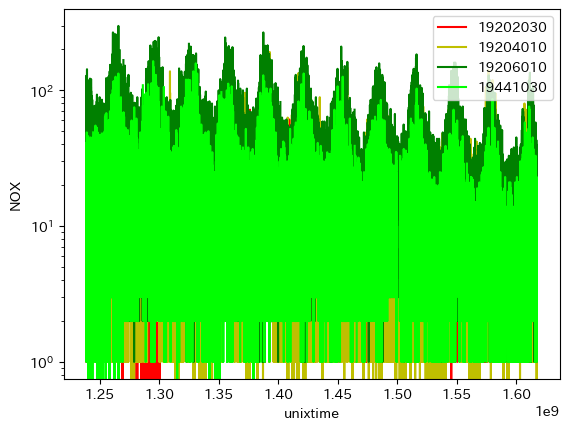

In [43]:
# 指定された局の、全期間のNOX値を抽出する。

import sys
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_ylabel("NOX")

stations = {"19202030": "r", "19204010": "y", "19206010": "g", "19441030": "lime"}

nox = []
for station in stations:
    dfs = []
    for year in range(2009, 2021):
        with open(f"{BASEDIR}../air/19/{year}/j19{year}_{station}.csv") as f:
            df = pd.read_csv(f, parse_dates=[1])  # parse date time in column 1
            dfs.append(df)

    dfs = pd.concat(dfs)

    dfs["datetime"] = pd.to_datetime(dfs["date"]).dt.tz_localize("Asia/Tokyo")
    dfs["unixtime"] = dfs["datetime"].astype(int) // 10**9
    dfs.index = dfs.unixtime
    if len(nox) == 0:
        nox.append(dfs.datetime)

    # print(dfs.head())
    # 月単位にグループ化します。
    # grouped_df = dfs["NOX"].groupby(pd.Grouper(level="date", freq="M"))

    # 各グループの平均値を計算します。
    # mean_df = grouped_df.mean()
    mean_df = dfs["NOX"]

    # 結果を表示します。
    # print(mean_df)
    mean_df.plot(color=stations[station], ax=ax, label=station)
    nox.append(mean_df)


nox = pd.concat(nox, axis=1)
nox.columns = ["datetime"] + list(stations)
nox = nox.reset_index(drop=False)

# plt.plot(mean_df["NOX"])
plt.yscale("log")
plt.legend()
nox

流量は不要だが、川の窒素濃度の量と時刻が必要。`level`のコードを流用する。

## 河港課データから流量と雨量の読みこみ

In [44]:
sys.path.insert(0, "..")
from level.level import scan_data

大月雨量 = scan_data("大月雨量", BASEDIR)
大月雨量

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/Dat

04/01 00:00
07/01 00:00
03/01 00:00
01/01 00:00
02/01 00:00
08/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/Dat

11/01 00:00
09/01 00:00
06/01 00:00
05/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/Dat

05/01 00:00
06/01 00:00
12/01 00:00
08/01 00:00
11/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/Dat

10/01 00:00
09/01 00:00
07/01 00:00
04/01 00:00


,datetime,大月雨量
0,2005-01-01 00:00:00+09:00,0.0
1,2005-01-01 01:00:00+09:00,0.0
2,2005-01-01 02:00:00+09:00,0.0
3,2005-01-01 03:00:00+09:00,0.0
4,2005-01-01 04:00:00+09:00,0.0
...,...,...
667,2023-02-28 19:00:00+09:00,0.0
668,2023-02-28 20:00:00+09:00,0.0
669,2023-02-28 21:00:00+09:00,0.0
670,2023-02-28 22:00:00+09:00,0.0


## 遅延データの生成

In [90]:
from level.level import delayed_data

precip = delayed_data(大月雨量.大月雨量, lookback=24)[:, ::-1]  # 左右反転しておく。
# 時刻がずれると困るので、pandasに戻す。
precip = pd.DataFrame(precip)
# print(w.shape, 大月雨量.shape)
precip = pd.concat([大月雨量.reset_index(drop=False).datetime, precip], axis=1)
print(precip)
precip = precip.dropna(axis=0, how="any")
# precip

                        datetime    0    1    2    3    4    5    6    7    8  \
0      2005-01-01 00:00:00+09:00  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1      2005-01-01 01:00:00+09:00  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2      2005-01-01 02:00:00+09:00  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
3      2005-01-01 03:00:00+09:00  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
4      2005-01-01 04:00:00+09:00  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN   
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
134042 2023-02-28 19:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
134043 2023-02-28 20:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
134044 2023-02-28 21:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
134045 2023-02-28 22:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
134046 2023-02-28 23:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        ...   14   15   16 

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


大気窒素もdelayed_dataを作っておくと便利

In [92]:
from level.level import delayed_data

nox_delay = delayed_data(nox["19204010"], lookback=24)[:, ::-1]  # 左右反転しておく。
# 時刻がずれると困るので、pandasに戻す。
nox_delay = pd.DataFrame(nox_delay)
# print(w.shape, 大月雨量.shape)
nox_delay = pd.concat([nox.reset_index(drop=False).datetime, nox_delay], axis=1)
# print(nox_delay)
nox_delay = nox_delay.dropna(axis=0, how="any")
# nox_delay

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


## `flow`から川の窒素濃度の読みこみ

In [306]:
river_N = pd.read_csv(f"{BASEDIR}../flow/大月橋.N.csv")
# datetimeに変換し、分を省く
river_N.datetime = pd.to_datetime(river_N.datetime).dt.floor("h")
# river_N

## 水質測定時刻から24時間前までの雨量

In [307]:
P = pd.merge(river_N, precip, on="datetime", how="left")
P

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1636001400,2021-11-04 13:00:00+09:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,1638420480,2021-12-02 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,1641443520,2022-01-06 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,1643863800,2022-02-03 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 水質測定時刻から24時間前までの大気NOX

In [308]:
c = pd.merge(river_N, nox_delay, on="datetime", how="left")
c

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1636001400,2021-11-04 13:00:00+09:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,1638420480,2021-12-02 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,1641443520,2022-01-06 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,1643863800,2022-02-03 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 降雨→流量のインパルス応答

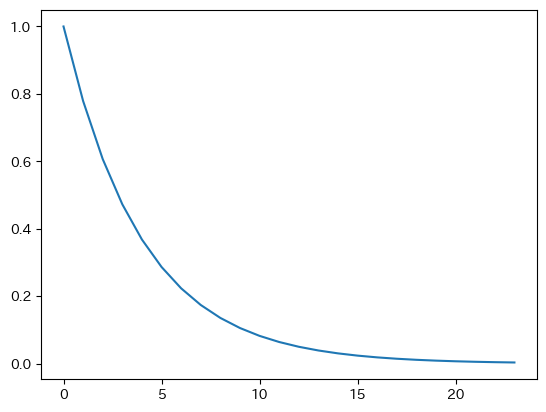

In [309]:
import numpy as np

# インパルス応答は6時間で1/eに落ちる減衰関数。
decay_time = 4  # hours
xtick = np.arange(0, 24)
impulse_response = np.exp(-xtick / decay_time)
# impulse_response = 6 / (xtick + 1) ** 0.65 - 15000 / (xtick + 5) ** 5
plt.plot(impulse_response)

## 24時間の畳みこみ積分

In [310]:
wc = c.to_numpy()[:, -24:] @ impulse_response
wcP = (c.to_numpy()[:, -24:] * P.to_numpy()[:, -24:]) @ impulse_response
wP = P.to_numpy()[:, -24:] @ impulse_response
cr = river_N.value
wc, wcP, wP, cr

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, 82.22165855684138, 85.52108456589265,
        73.91280993443627, 95.46812573856948, 86.71507776440811,
        104.80278875489633, 84.59524704233266, 137.59260642693965,
        70.87359399744336, 75.03077435620949, 120.66346897348915,
        70.5449553577403, 145.04126358524908, 61.42950974981831, nan,
        73.26566569556431, 47.34863253840519, 42.19151096367582,
        63.991349

NaN行を削るために、一旦DataFrameにし、再び分解する。

In [311]:
Xy = pd.DataFrame([wc, wcP, wP, cr]).transpose().dropna(axis=0)
Xy.columns = ["wc", "wcP", "wP", "cr"]

wc1 = Xy["wc"]
wcP1 = Xy["wcP"]
wP1 = Xy["wP"]
cr1 = Xy["cr"]
Xy

,wc,wcP,wP,cr
125,42.191511,0.000000,0.000000,1.40
127,102.363627,0.000000,0.000000,1.10
128,165.849845,0.000000,0.000000,1.30
141,45.266578,0.000000,0.000000,1.50
142,196.717750,0.000000,0.000000,1.30
...,...,...,...,...
246,44.660851,0.812012,0.135335,0.98
247,31.730636,0.000000,0.000000,1.00
248,46.317696,0.000000,0.000000,1.10
249,49.404859,0.000000,0.000000,1.20


89個しかない。

In [312]:
import scipy
from dataclasses import dataclass
from typing import Union


@dataclass
class AvgStd:
    avg: Union[float, np.ndarray]
    std: Union[float, np.ndarray]


def trend(w, B, C, D, E, F):
    # 係数が負にならないように、すべて二乗した。
    # 算出された係数も、実際には二乗して利用する。
    wc, wcP, wP = w
    return (B**2 * wc + C**2 * wcP + D**2) / (F**2 * wP + 1) + E**2


def powc(a: AvgStd, n: float):
    return AvgStd(a.avg**n, np.abs(a.std * n * a.avg ** (n - 1)))


def trend_error(w, B: AvgStd, C: AvgStd, D: AvgStd, E: AvgStd, F: AvgStd):
    """誤差の評価。

    Args:
        w (_type_): _description_
        B (AvgStd): _description_
        C (AvgStd): _description_
        D (AvgStd): _description_
        E (AvgStd): _description_
        F (AvgStd): _description_
    """

    def add3(a, b, c):
        return add(add(a, b), c)

    def add(a, b):
        return AvgStd(avg=a.avg + b.avg, std=(a.std**2 + b.std**2) ** 0.5)

    def div(a: AvgStd, b: AvgStd):
        cavg = a.avg / b.avg
        cstd = ((a.std / a.avg) ** 2 + (b.std / b.avg) ** 2) ** 0.5 * cavg
        return AvgStd(cavg, cstd)

    def mulc(a: AvgStd, c: float):
        return AvgStd(a.avg * c, a.std * c)

    def addc(a: AvgStd, c: float):
        return AvgStd(a.avg + c, a.std)

    wc, wcP, wP = w
    # return add(div(add3(mulc(B, wc), mulc(C, wcP), D), addc(mulc(F, wP), 1)), E)
    return add(
        div(
            add3(mulc(powc(B, 2), wc), mulc(powc(C, 2), wcP), powc(D, 2)),
            addc(mulc(powc(F, 2), wP), 1),
        ),
        powc(E, 2),
    )


# popt, pcov = scipy.optimize.curve_fit(trend, (wc1, wcP1, wP1), cr1, p0=[9.5e-4, -2.4e-4, -6.6e-2, 1.15, 34])
popt, pcov = scipy.optimize.curve_fit(
    trend, (wc1, wcP1, wP1), cr1, p0=[0.1, 0.3, 0.1, 0.1, 0.1], maxfev=12000
)
# popt, pcov = scipy.optimize.curve_fit(trend, (wc1, wcP1, wP1), cr1, maxfev=12000)
B, C, D, E, F = popt
Berror, Cerror, Derror, Eerror, Ferror = np.diagonal(pcov) ** 0.5
B = AvgStd(B, Berror)
C = AvgStd(C, Cerror)
D = AvgStd(D, Derror)
E = AvgStd(E, Eerror)
F = AvgStd(F, Ferror)

print(f"{powc(B,2)}")
print(f"{powc(C,2)}")
# print(f"{D=}")
print(f"{powc(D,2)}")
print(f"{powc(E,2)}")
print(f"{powc(F,2)}")
# plt.errorbar(
#     ["B", "C", "D", "E", "F"],
#     popt / np.abs(popt),
#     yerr=errors / np.abs(popt),
#     label=f"インパルス応答の減衰時定数 {decay_time}時間",
# )
# plt.title("平均を1とした時の標準偏差の比較")
# plt.legend()

AvgStd(avg=np.float64(0.001287835382841323), std=np.float64(0.00047067234928855223))
AvgStd(avg=np.float64(0.00046254895991743625), std=np.float64(0.00557046013323463))
AvgStd(avg=np.float64(2.0120843414047678e-07), std=np.float64(0.2559105961024525))
AvgStd(avg=np.float64(1.085344792638357), std=np.float64(0.3910629919580607))
AvgStd(avg=np.float64(0.210200326218838), std=np.float64(1.3832524430686994))


In [313]:
pcov

array([[ 4.30048093e-05,  9.06492689e-05, -6.44626088e-01,
         3.25688482e-04,  2.95621099e-03],
       [ 9.06492689e-05,  1.67712117e-02,  8.72190966e+00,
        -6.02577679e-03,  1.63134672e-01],
       [-6.44626088e-01,  8.72190966e+00,  8.13711332e+04,
        -5.32992368e+01, -1.28443050e+02],
       [ 3.25688482e-04, -6.02577679e-03, -5.32992368e+01,
         3.52261937e-02,  8.10680131e-02],
       [ 2.95621099e-03,  1.63134672e-01, -1.28443050e+02,
         8.10680131e-02,  2.27567121e+00]])

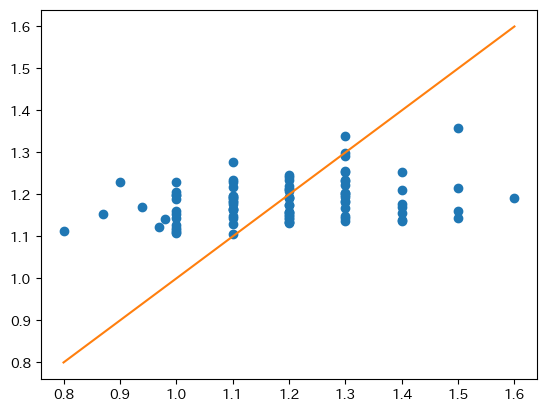

[[1.         0.31375845]
 [0.31375845 1.        ]]


(0.0, 2.0)

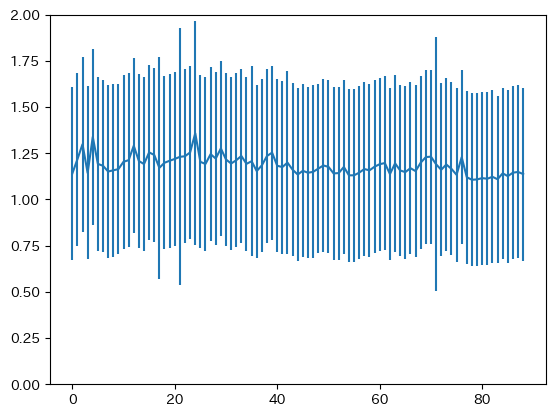

In [314]:
pred = trend((wc1, wcP1, wP1), B.avg, C.avg, D.avg, E.avg, F.avg)
errors = trend_error((wc1, wcP1, wP1), B, C, D, E, F)
xtick = np.linspace(min(cr1), max(cr1), 3)
plt.plot(cr1, pred, "o")
plt.plot(xtick, xtick, "-")
plt.show()
print(np.corrcoef(cr1, pred))
plt.errorbar(x=np.arange(pred.shape[0]), y=pred, yerr=errors.std)
plt.ylim(0, 2)

In [315]:
list(errors.std)

[0.46777649795284015,
 0.46983165402464333,
 0.47382909013983704,
 0.467840176629358,
 0.47643817220730034,
 0.46899181033664034,
 0.4649617142701767,
 0.4679755116968514,
 0.468105689799323,
 0.4618197197797635,
 0.46936380571391434,
 0.4696609276246374,
 0.47334776457676436,
 0.46950638324834254,
 0.4689679936555073,
 0.4714401718094733,
 0.47079881687608127,
 0.6017324784178857,
 0.4691864476328845,
 0.4695542308403465,
 0.4699143582546056,
 0.6959161280395469,
 0.4705043191015772,
 0.4702917230420403,
 0.6053693640152656,
 0.4679046721069223,
 0.46860124081776605,
 0.4709919485181986,
 0.46999411117009154,
 0.47253555477670584,
 0.46980644818294776,
 0.4690560390312182,
 0.46965210240010813,
 0.4704449977539423,
 0.46900427233443687,
 0.5145894853943045,
 0.4680202886487089,
 0.4687668587495112,
 0.470564066923917,
 0.47136893898783727,
 0.46870505876059915,
 0.4685091513936895,
 0.49609424674513786,
 0.46817399898262047,
 0.4677060934902924,
 0.46805156773384426,
 0.46256018314547

In [316]:
pred

125    1.139681
127    1.217172
128    1.298932
141    1.143641
142    1.338685
         ...   
246    1.141635
247    1.126209
248    1.144995
249    1.148970
250    1.137468
Length: 89, dtype: float64

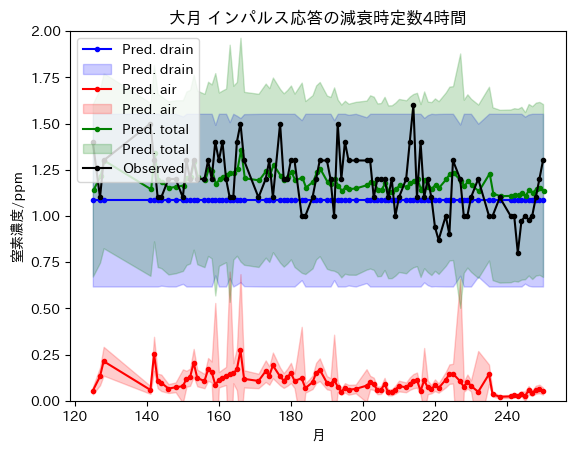

In [317]:
def plot_river_content(wc1, wcP1, wP1, cr1, B, C, D, E, F, title=None):

    zero = AvgStd(0, 0)
    # drain = trend((wc1, wcP1, wP1), 0, 0, D.avg, E.avg, F.avg)
    pred = trend_error((wc1, wcP1, wP1), B, C, D, E, F)
    drain = trend_error((wc1, wcP1, wP1), zero, zero, D, E, F)
    # air = trend((wc1, wcP1, wP1), B.avg, C.avg, 0, 0, F.avg)
    air = trend_error((wc1, wcP1, wP1), B, C, zero, zero, F)
    plt.plot(drain.avg.index, drain.avg, "b.-", label="Pred. drain")
    plt.fill_between(
        drain.avg.index,
        drain.avg - drain.std,
        drain.avg + drain.std,
        color="b",
        alpha=0.2,
        label="Pred. drain",
    )
    plt.plot(air.avg.index, air.avg, "r.-", label="Pred. air")
    plt.fill_between(
        air.avg.index,
        air.avg - air.std,
        air.avg + air.std,
        color="r",
        alpha=0.2,
        label="Pred. air",
    )
    plt.plot(pred.avg.index + 0.2, pred.avg, "g.-", label="Pred. total")
    plt.fill_between(
        pred.avg.index,
        pred.avg - pred.std,
        pred.avg + pred.std,
        color="g",
        alpha=0.2,
        label="Pred. total",
    )
    # plt.errorbar(pred.index + 0.4, pred, yerr=errors.std, label="Pred. total ")
    # plt.plot(trend((wc1, wcP1, wP1), B, C, D, E, F), ".-")
    plt.plot(cr1, ".-k", label="Observed")
    plt.ylim(0, 2)
    if title is not None:
        plt.title(title)
    plt.xlabel("月")
    plt.ylabel("窒素濃度/ppm")
    plt.legend()


plot_river_content(
    wc1,
    wcP1,
    wP1,
    cr1,
    B,
    C,
    D,
    E,
    F,
    title=f"大月 インパルス応答の減衰時定数{decay_time}時間",
)

In [318]:
pcov

array([[ 4.30048093e-05,  9.06492689e-05, -6.44626088e-01,
         3.25688482e-04,  2.95621099e-03],
       [ 9.06492689e-05,  1.67712117e-02,  8.72190966e+00,
        -6.02577679e-03,  1.63134672e-01],
       [-6.44626088e-01,  8.72190966e+00,  8.13711332e+04,
        -5.32992368e+01, -1.28443050e+02],
       [ 3.25688482e-04, -6.02577679e-03, -5.32992368e+01,
         3.52261937e-02,  8.10680131e-02],
       [ 2.95621099e-03,  1.63134672e-01, -1.28443050e+02,
         8.10680131e-02,  2.27567121e+00]])

ほかの観測地点での計算も、大月の降水量を利用することにする。

大気質については、前回同様近くの測定局の値を用いる。

このモデルは、流量自体も回帰で推定している。それが実際の流量(といっても信頼に足る情報があまりないが)と近いのかどうかよくわからない。

Fの値は0.3ぐらい、それに定数1を足すので、雨が降らないときが1、毎時1mmの降雨に0.3ぐらい増えるという感じか。

水量をプロットしてみよう。(縦軸、横軸はてきとう)

In [157]:
# 検証用に、流量も読んでおく。
river_flow = pd.read_csv("../flow/大月橋.flow.csv")
# datetimeに変換し、分を省く
river_flow.datetime = pd.to_datetime(river_flow.datetime).dt.floor("h")
river_flow

,unixtime,datetime,value
0,956120700,2000-04-19 14:00:00+09:00,2.0700
1,957933840,2000-05-10 13:00:00+09:00,5.5200
2,960352020,2000-06-07 13:00:00+09:00,2.3100
3,962769960,2000-07-05 13:00:00+09:00,5.3000
4,965191260,2000-08-02 13:00:00+09:00,4.8000
...,...,...,...
261,1635984900,2021-11-04 09:00:00+09:00,2.3989
262,1638403500,2021-12-02 09:00:00+09:00,1.9112
263,1641428040,2022-01-06 09:00:00+09:00,2.2199
264,1643847000,2022-02-03 09:00:00+09:00,1.7425


In [293]:
# 流量を測定した時刻からさかのぼること24時間の雨量
P2 = pd.merge(river_flow, precip, on="datetime", how="left")
P2

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,2.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,5.5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,2.3100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,5.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,4.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1635984900,2021-11-04 09:00:00+09:00,2.3989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,1638403500,2021-12-02 09:00:00+09:00,1.9112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,1641428040,2022-01-06 09:00:00+09:00,2.2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,1643847000,2022-02-03 09:00:00+09:00,1.7425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


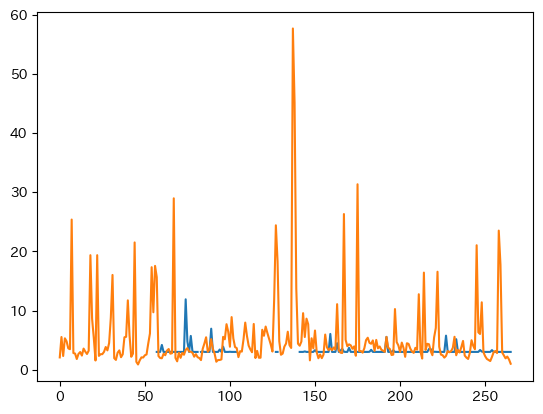

In [294]:
wP2 = P2.to_numpy()[:, -24:] @ impulse_response

plt.plot((F.avg**2 * wP2 + 1) * 3)
plt.plot(P2.value)

In [291]:
plt.hist((F**2 * wP2 + 1) * 2.5, alpha=0.5, bins=20, range=(0, 60))
plt.hist(P2.value, alpha=0.5, bins=20, range=(0, 60))
plt.yscale("log")

TypeError: unsupported operand type(s) for ** or pow(): 'AvgStd' and 'int'

decayを4時間にすると、かなり流量とF*wP+1が似た感じになる。

## 他の地点でもモデル化

1. 雨量は大月の値を流用する。
2. 大気窒素も大月局の値を流用する。
3. 水質窒素はそれぞれの橋の値を読む。

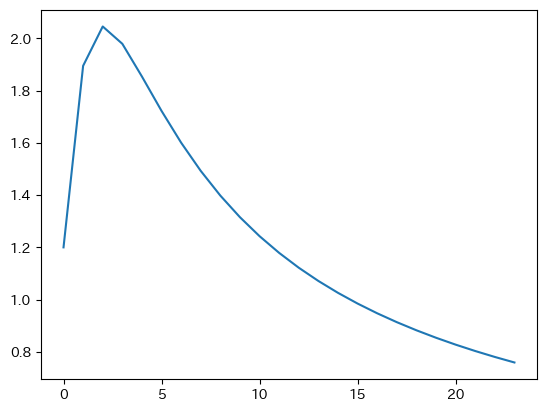

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


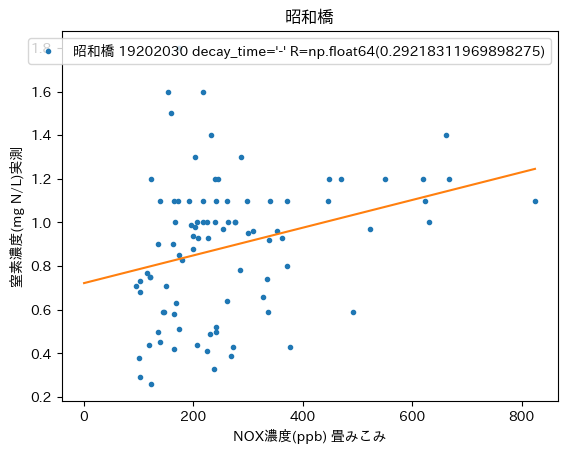

AvgStd(avg=np.float64(0.0005232677656407949), std=np.float64(0.0002613854939672835))
AvgStd(avg=np.float64(0.011661837599337536), std=np.float64(0.03933132377808755))
AvgStd(avg=np.float64(0.21035613553105992), std=np.float64(0.368241860893534))
AvgStd(avg=np.float64(0.5349707537597832), std=np.float64(0.34667220400878956))
AvgStd(avg=np.float64(0.27817656833203364), std=np.float64(1.1529395808030898))


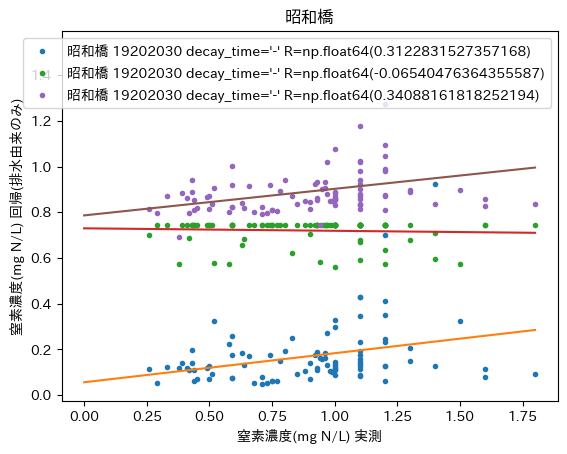

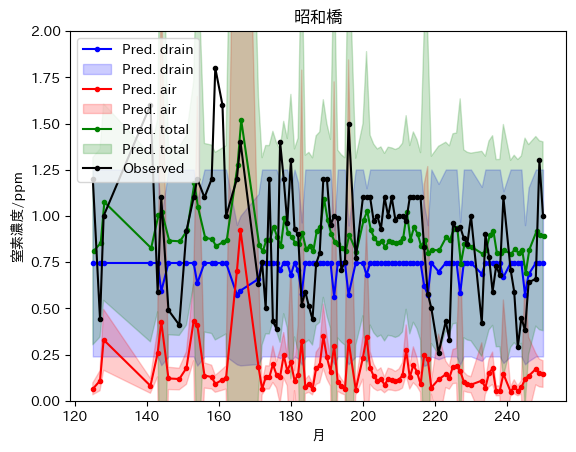

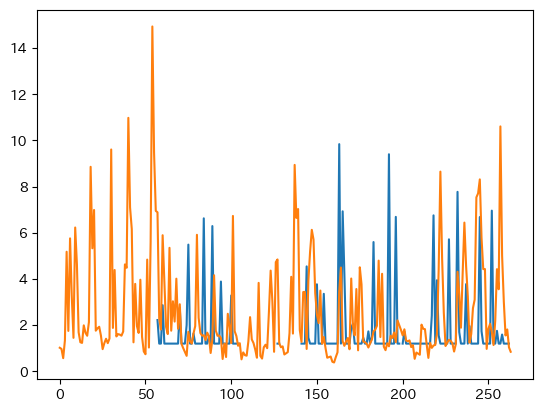

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


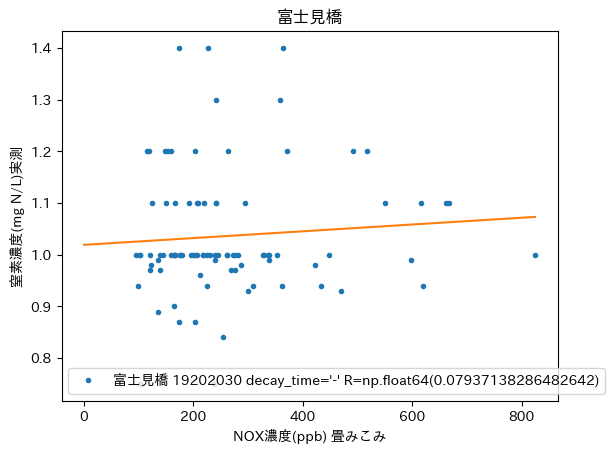

AvgStd(avg=np.float64(6.240938811829745e-05), std=np.float64(9.517004376036278e-05))
AvgStd(avg=np.float64(2.2949601412895596e-05), std=np.float64(0.0002092495220050395))
AvgStd(avg=np.float64(3.3673308896202556e-05), std=np.float64(123.76183364589426))
AvgStd(avg=np.float64(1.0192946493625907), std=np.float64(123.75625486292607))
AvgStd(avg=np.float64(6.076743837462675e-09), std=np.float64(0.07017652731833286))


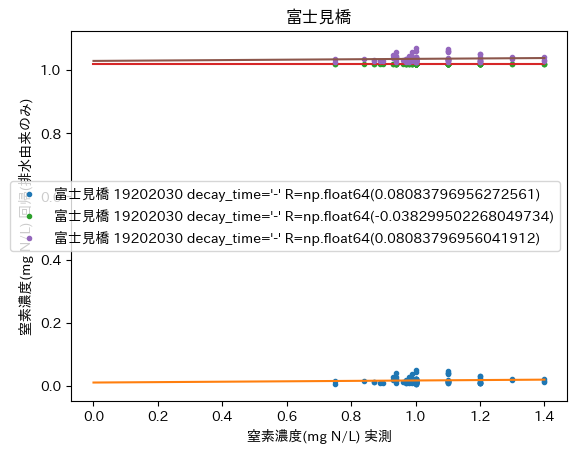

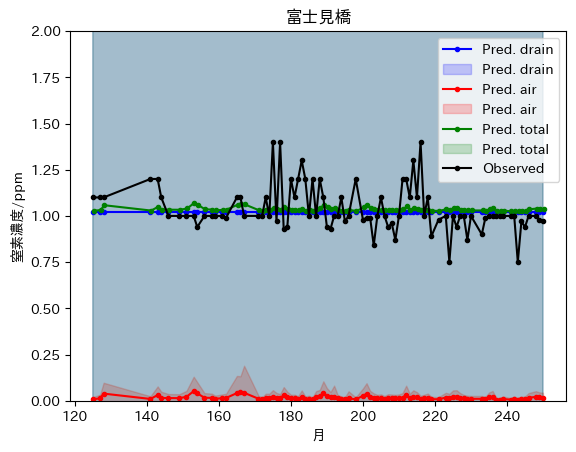

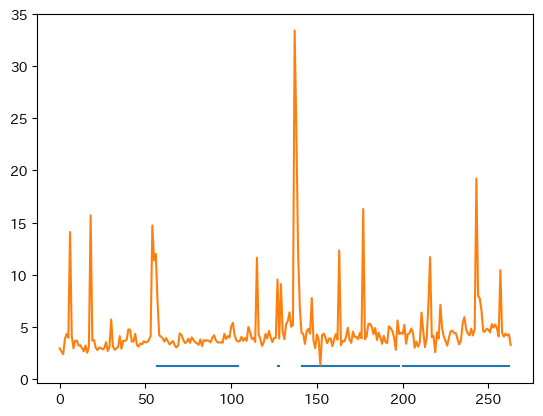

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


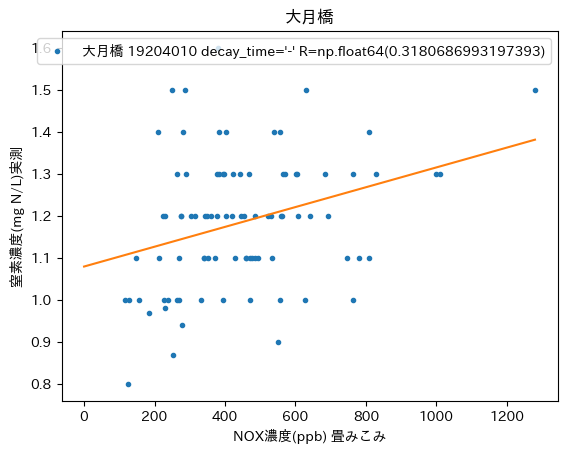

AvgStd(avg=np.float64(0.00025075397651766696), std=np.float64(8.969735901956997e-05))
AvgStd(avg=np.float64(1.4764589097379124e-10), std=np.float64(0.00020718313105625826))
AvgStd(avg=np.float64(1.0793814259276275), std=np.float64(34.47998780519082))
AvgStd(avg=np.float64(0.0014464648489812108), std=np.float64(34.258362305372486))
AvgStd(avg=np.float64(0.002935905895726467), std=np.float64(0.0916679740966543))


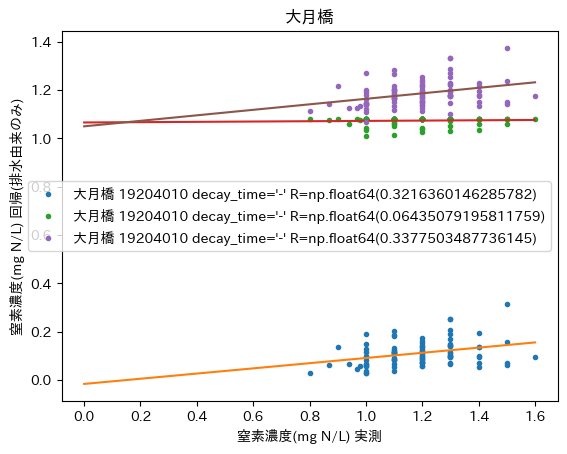

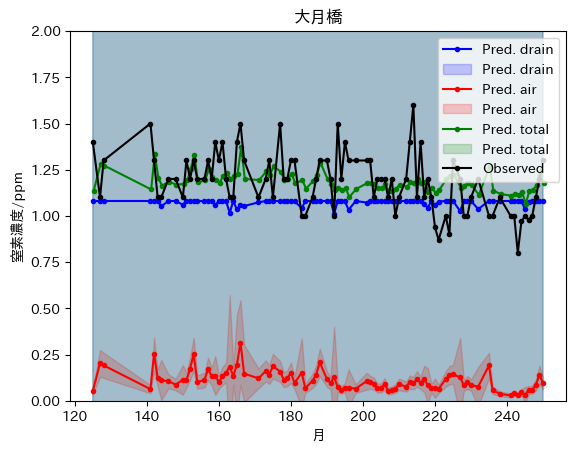

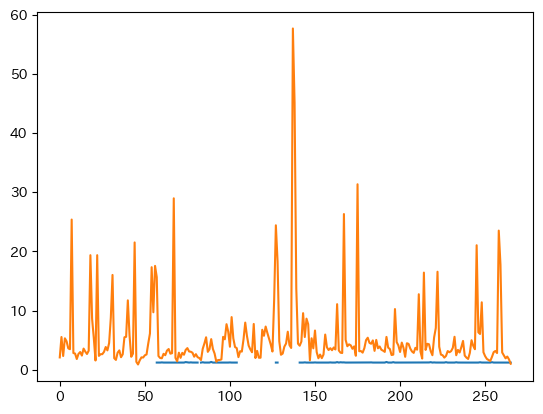

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/model2024/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


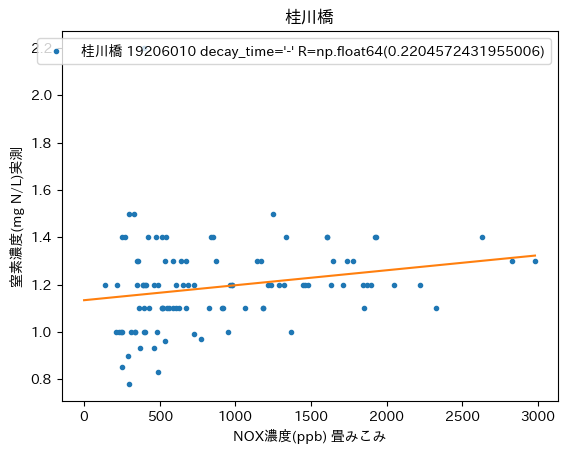

AvgStd(avg=np.float64(5.710357359168113e-05), std=np.float64(2.9824193965139565e-05))
AvgStd(avg=np.float64(0.0001462200357139524), std=np.float64(0.00033144243693851953))
AvgStd(avg=np.float64(1.1437104992057623), std=np.float64(22.498096890631697))
AvgStd(avg=np.float64(5.780233373377288e-06), std=np.float64(15.69792336029066))
AvgStd(avg=np.float64(0.004818813476428209), std=np.float64(0.10034798559981646))


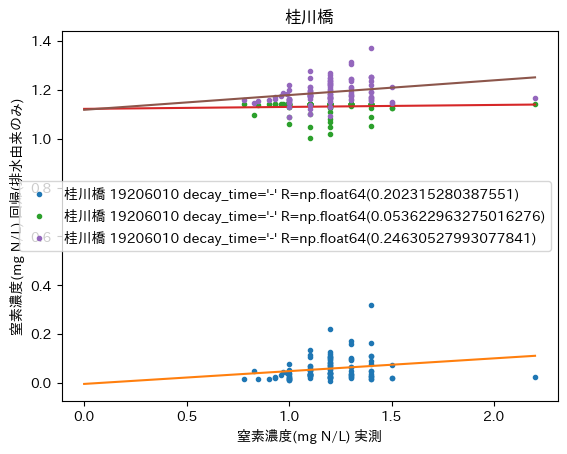

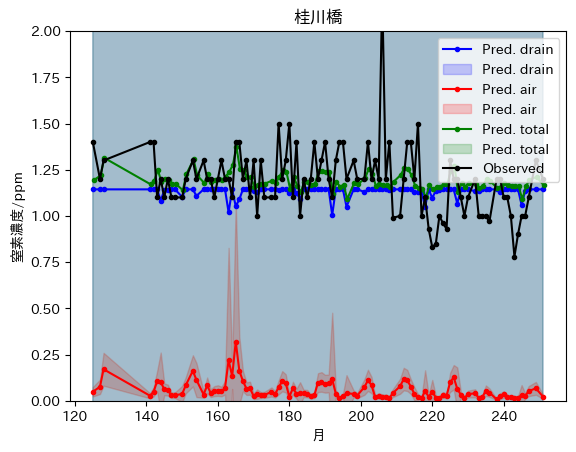

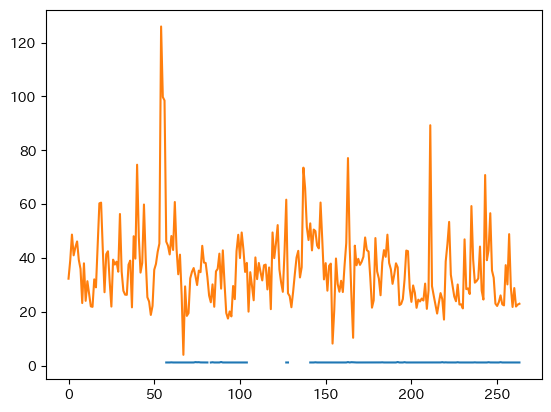

In [352]:
bridges = {
    "昭和橋": "19202030",
    "富士見橋": "19202030",
    "大月橋": "19204010",
    "桂川橋": "19206010",
}

# impulse_response = np.ones(24)
# decay_time = "-"
import numpy as np

# インパルス応答は6時間で1/eに落ちる減衰関数。
decay_time = 8  # hours
lookback = 24
xtick = np.arange(0, lookback)
# impulse_response = np.exp(-xtick / decay_time)

decay_time = "-"  # hours
impulse_response = 6 / (xtick + 1) ** 0.65 - 15000 / (xtick + 5) ** 5
plt.plot(impulse_response)
plt.show()


for bridge, station in bridges.items():
    # 大気窒素
    nox_delay = delayed_data(nox[station], lookback=lookback)[
        :, ::-1
    ]  # 左右反転しておく。
    # 時刻がずれると困るので、pandasに戻す。
    nox_delay = pd.DataFrame(nox_delay)
    # print(w.shape, 大月雨量.shape)
    nox_delay = pd.concat([nox.reset_index(drop=False).datetime, nox_delay], axis=1)
    # print(nox_delay)
    nox_delay = nox_delay.dropna(axis=0, how="any")

    river_N = pd.read_csv(f"{BASEDIR}../flow/{bridge}.N.csv")
    # datetimeに変換し、分を省く
    river_N.datetime = pd.to_datetime(river_N.datetime).dt.floor("h")

    P = pd.merge(river_N, precip, on="datetime", how="left")

    c = pd.merge(river_N, nox_delay, on="datetime", how="left")
    # print(c.head())

    wc = c.to_numpy()[:, -lookback:] @ impulse_response
    wcP = (c.to_numpy()[:, -lookback:] * P.to_numpy()[:, -lookback:]) @ impulse_response
    wP = P.to_numpy()[:, -lookback:] @ impulse_response
    cr = river_N.value

    Xy = pd.DataFrame([wc, wcP, wP, cr]).transpose().dropna(axis=0)
    Xy.columns = ["wc", "wcP", "wP", "cr"]

    wc1 = Xy["wc"]
    wcP1 = Xy["wcP"]
    wP1 = Xy["wP"]
    cr1 = Xy["cr"]

    R = np.corrcoef(wc1, cr1)[0, 1]
    plt.plot(
        wc1,
        cr1,
        ".",
        label=f"{bridge} {station} {decay_time=} {R=}",
    )
    plt.title(bridge)
    plt.xlabel("NOX濃度(ppb) 畳みこみ")
    plt.ylabel("窒素濃度(mg N/L)実測")
    plt.legend()
    (A, B), pcov = scipy.optimize.curve_fit(lambda x, A, B: A * x + B, wc1, cr1)
    X = np.linspace(0, wc1.max(), 100)
    Y = A * X + B
    plt.plot(X, Y)
    plt.show()

    # popt, pcov = scipy.optimize.curve_fit(trend, (wc1, wcP1, wP1), cr1, p0=[9.5e-4, -2.4e-4, -6.6e-2, 1.15, 34])
    popt, pcov = scipy.optimize.curve_fit(
        trend, (wc1, wcP1, wP1), cr1, p0=[0.2, 0.2, 0.2, 0.1, 0.1], maxfev=12000
    )

    # popt, pcov = scipy.optimize.curve_fit(trend, (wc1, wcP1, wP1), cr1, maxfev=12000)
    B, C, D, E, F = popt
    Berror, Cerror, Derror, Eerror, Ferror = np.diagonal(pcov) ** 0.5
    B = AvgStd(B, Berror)
    C = AvgStd(C, Cerror)
    D = AvgStd(D, Derror)
    E = AvgStd(E, Eerror)
    F = AvgStd(F, Ferror)

    print(f"{powc(B,2)}")
    print(f"{powc(C,2)}")
    # print(f"{D=}")
    print(f"{powc(D,2)}")
    print(f"{powc(E,2)}")
    print(f"{powc(F,2)}")

    cr1_air = (B.avg**2 * wc1 + C.avg**2 * wcP1) / (F.avg**2 * wP1 + 1)
    R = np.corrcoef(cr1, cr1_air)[0, 1]
    plt.plot(
        cr1,
        cr1_air,
        ".",
        label=f"{bridge} {station} {decay_time=} {R=}",
    )
    plt.title(bridge)
    plt.xlabel("窒素濃度(mg N/L) 実測")
    plt.ylabel("窒素濃度(mg N/L) 回帰(大気由来のみ)")
    plt.legend()
    (AA, BB), pcov = scipy.optimize.curve_fit(lambda x, A, B: A * x + B, cr1, cr1_air)
    X = np.linspace(0, cr1.max(), 100)
    Y = AA * X + BB
    plt.plot(X, Y)

    cr1_drain = D.avg**2 / (F.avg**2 * wP1 + 1) + E.avg**2
    R = np.corrcoef(cr1, cr1_drain)[0, 1]
    plt.plot(
        cr1,
        cr1_drain,
        ".",
        label=f"{bridge} {station} {decay_time=} {R=}",
    )
    plt.title(bridge)
    plt.xlabel("窒素濃度(mg N/L) 実測")
    plt.ylabel("窒素濃度(mg N/L) 回帰(排水由来のみ)")
    plt.legend()
    (AA, BB), pcov = scipy.optimize.curve_fit(lambda x, A, B: A * x + B, cr1, cr1_drain)
    X = np.linspace(0, cr1.max(), 100)
    Y = AA * X + BB
    plt.plot(X, Y)

    R = np.corrcoef(cr1, cr1_air + cr1_drain)[0, 1]
    plt.plot(
        cr1,
        cr1_air + cr1_drain,
        ".",
        label=f"{bridge} {station} {decay_time=} {R=}",
    )
    plt.title(bridge)
    plt.xlabel("窒素濃度(mg N/L) 実測")
    plt.ylabel("窒素濃度(mg N/L) 回帰(排水由来のみ)")
    plt.legend()
    (AA, BB), pcov = scipy.optimize.curve_fit(
        lambda x, A, B: A * x + B, cr1, cr1_air + cr1_drain
    )
    X = np.linspace(0, cr1.max(), 100)
    Y = AA * X + BB
    plt.plot(X, Y)

    plt.show()

    plot_river_content(
        wc1,
        wcP1,
        wP1,
        cr1,
        B,
        C,
        D,
        E,
        F,
        title=bridge,
        # title=f"{bridge} インパルス応答の減衰時定数{decay_time}時間",
    )
    plt.show()
    # 検証用に、流量も読んでおく。
    river_flow = pd.read_csv(f"{BASEDIR}../flow/{bridge}.flow.csv")
    # datetimeに変換し、分を省く
    river_flow.datetime = pd.to_datetime(river_flow.datetime).dt.floor("h")
    # 流量を測定した時刻からさかのぼること24時間の雨量
    P2 = pd.merge(river_flow, precip, on="datetime", how="left")
    wP2 = P2.to_numpy()[:, -lookback:] @ impulse_response

    plt.plot((F.avg**2 * wP2 + 1) * 1.2)
    plt.plot(P2.value)
    plt.show()

昭和橋以外はエラーバーが大きすぎる。Dのエラーに起因する。Dについては、リンの情報をとりいれることで改善できるかもしれない。

2009年より前は1時間ごとのNOX値が手にはいらない。一ヶ月に一回の測定値しかないので、定常値近似する。つまり、一ヶ月間同じ数値がならんだデータで補完する。

なんでNOXの年周変化がちゃんと見えていないのだろう。→以前は月平均を使っていたが、今回は日中の瞬間値を使っているせい?

でもちゃんと比較しておいたほうが良いかも。


In [324]:
nox

,unixtime,datetime,19202030,19204010,19206010,19441030
0,1238511600,2009-04-01 00:00:00+09:00,9.0,21.0,27.0,22.0
1,1238515200,2009-04-01 01:00:00+09:00,7.0,21.0,34.0,12.0
2,1238518800,2009-04-01 02:00:00+09:00,7.0,18.0,37.0,17.0
3,1238522400,2009-04-01 03:00:00+09:00,8.0,18.0,24.0,35.0
4,1238526000,2009-04-01 04:00:00+09:00,8.0,22.0,26.0,36.0
...,...,...,...,...,...,...
105187,1617184800,2021-03-31 19:00:00+09:00,6.0,5.0,8.0,9.0
105188,1617188400,2021-03-31 20:00:00+09:00,4.0,4.0,8.0,6.0
105189,1617192000,2021-03-31 21:00:00+09:00,4.0,4.0,10.0,6.0
105190,1617195600,2021-03-31 22:00:00+09:00,3.0,6.0,8.0,4.0


NOXの瞬間値と月間平均の比較。

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_19277/2851563083.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_df = tmp.groupby(pd.Grouper(level="datetime", freq="M"))


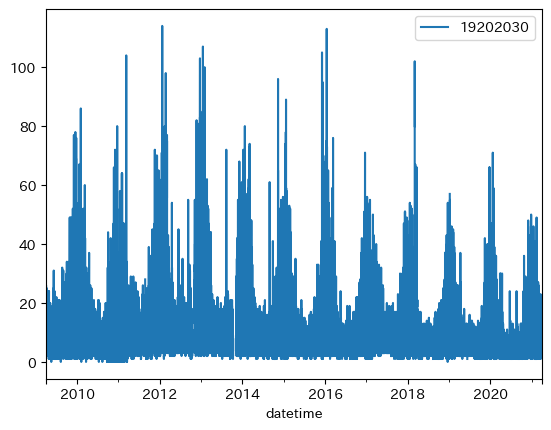

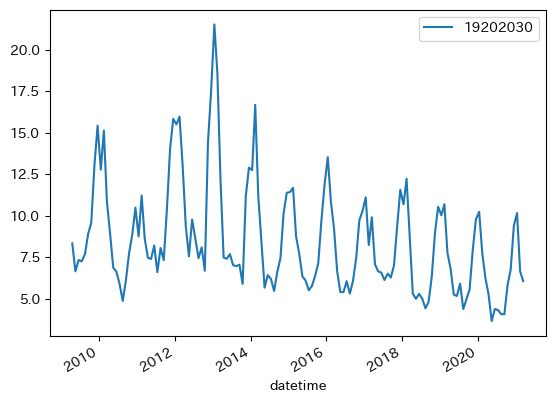

In [358]:
# 月単位にグループ化します。
tmp = nox[["datetime", "19202030"]]

nox.plot("datetime", "19202030")

tmp.index = tmp.datetime
grouped_df = tmp.groupby(pd.Grouper(level="datetime", freq="M"))

# 各グループの平均値を計算します。
mean_df = grouped_df.mean()

mean_df.plot("datetime", "19202030")
# plt.plot(mean_df["NOX"])
# plt.yscale("log")
plt.legend()

月単位で平均すると、nox.ipynbで見ていたのとほぼ同じグラフが得られた。

瞬間値はあばれまくりで、減少傾向を捉えるのは難しい。

なので、nox.ipynb〜nox3.ipynbでの回帰に比べて今回の精度が悪くなっているように見えるのはやむをえない面がある。間違いではないが。